#CLUSTERING ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [9]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [10]:
df=df.drop_duplicates()

In [11]:
# Check for outliers
from scipy import stats
numerical_columns = df.select_dtypes(include=['int64'])
z_scores = stats.zscore(numerical_columns)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")

Number of outlier rows: 0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

In [13]:
numerical_columns = df.select_dtypes(include=['int64'])

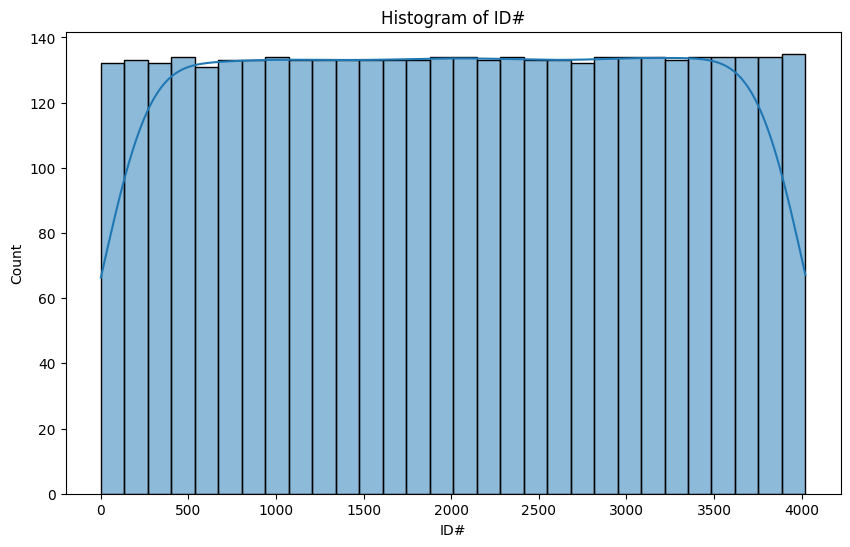

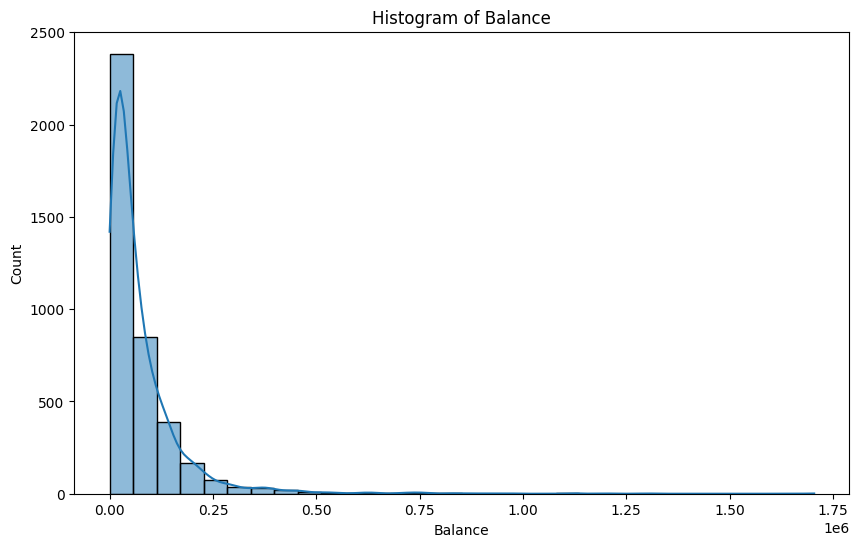

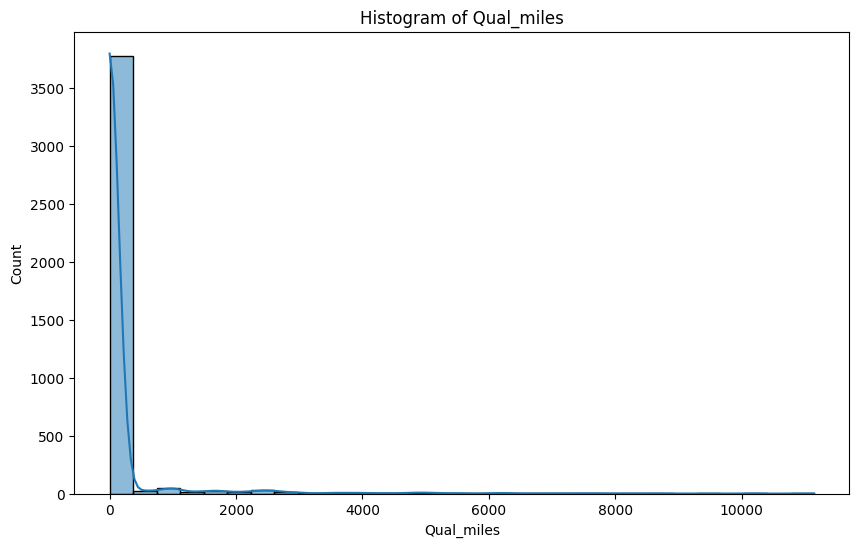

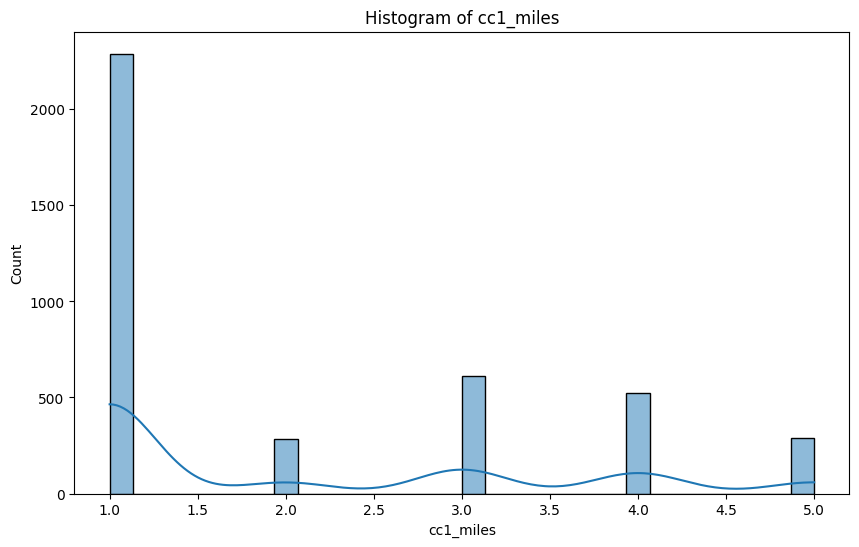

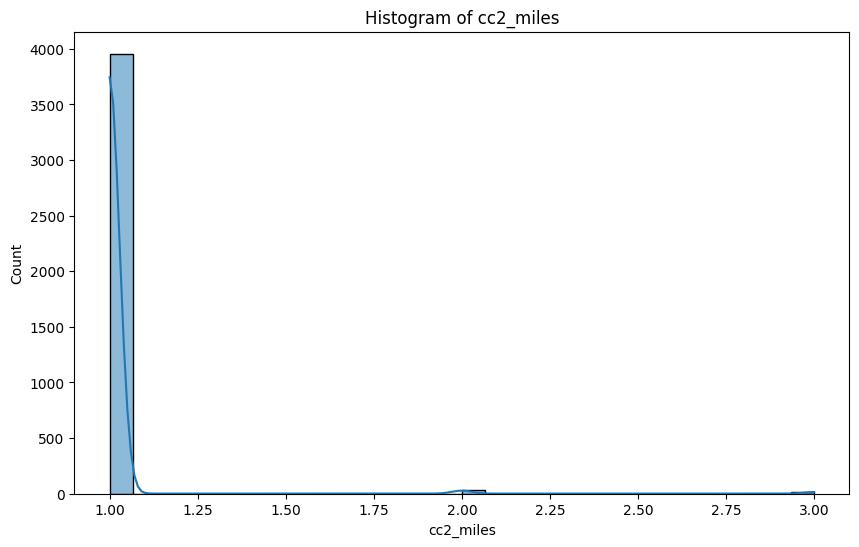

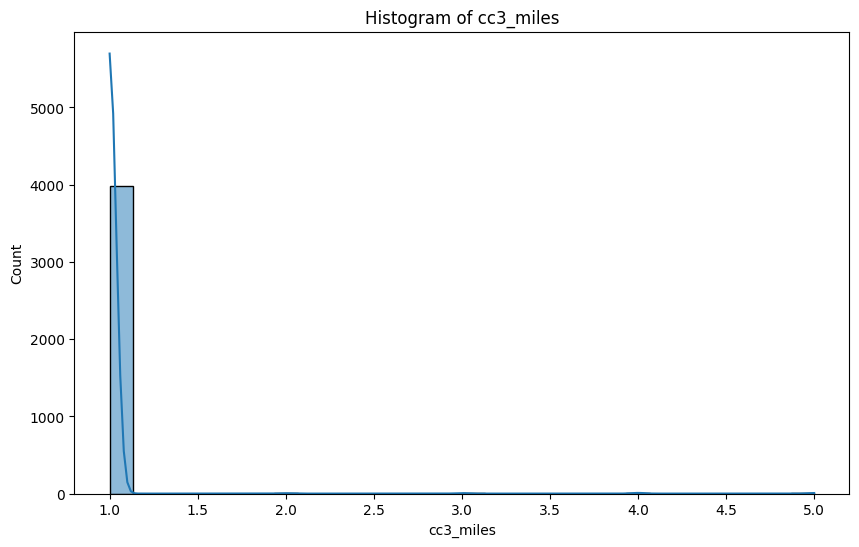

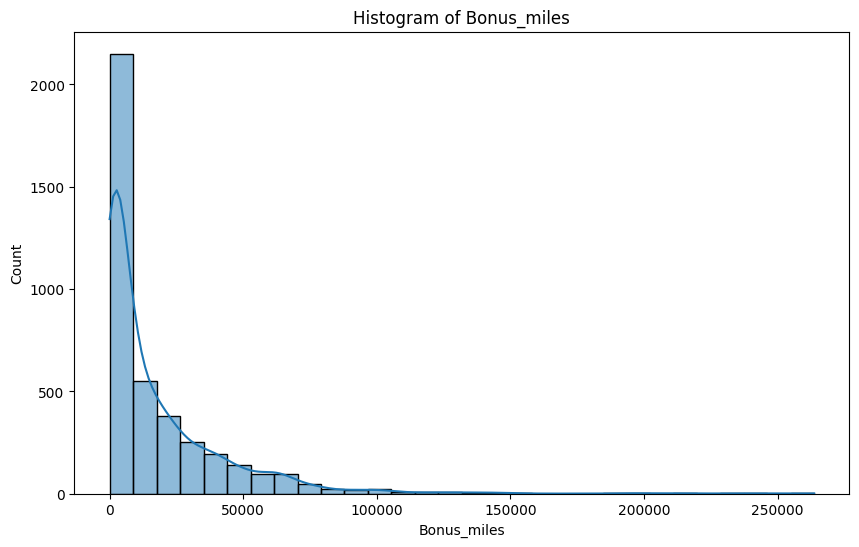

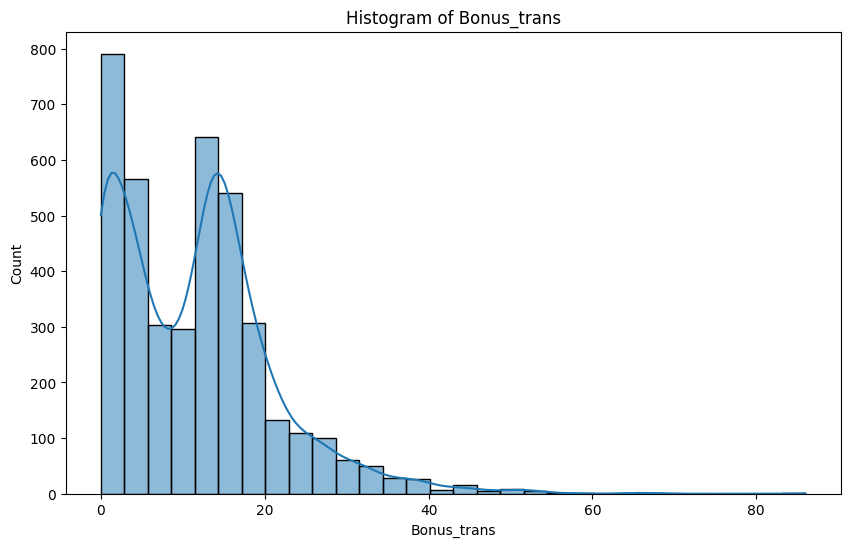

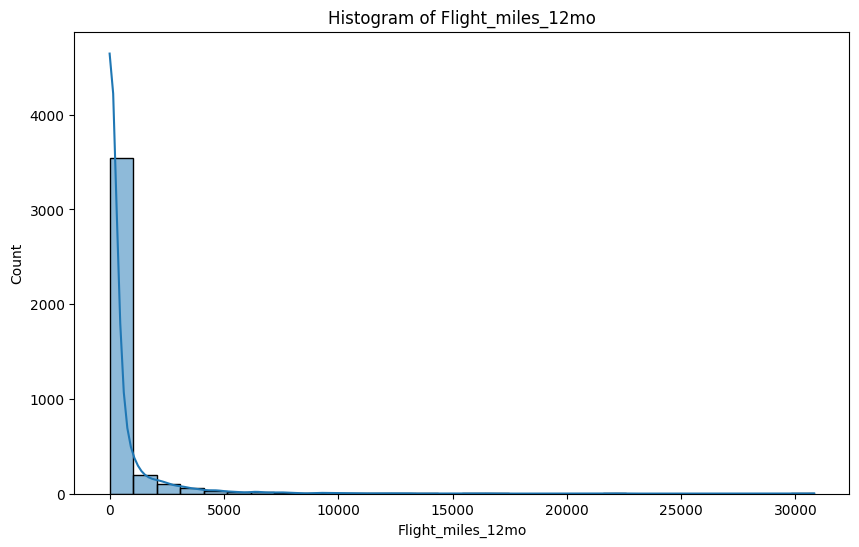

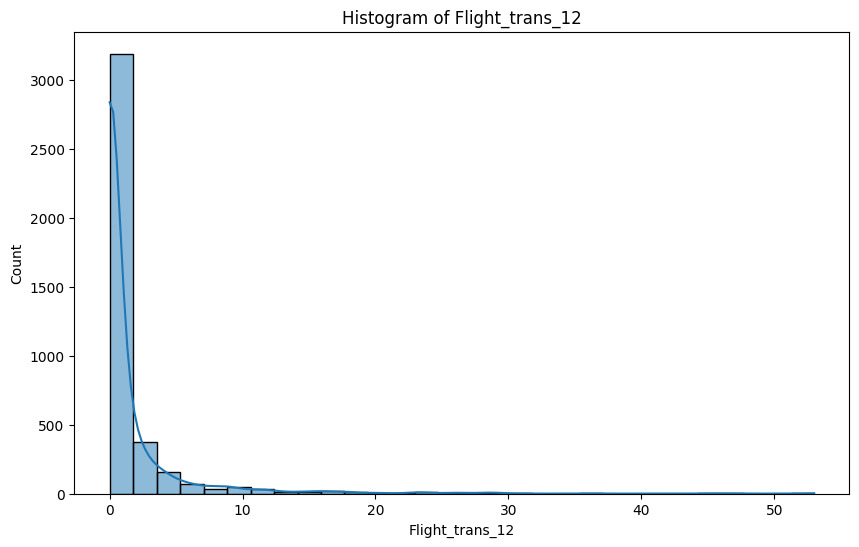

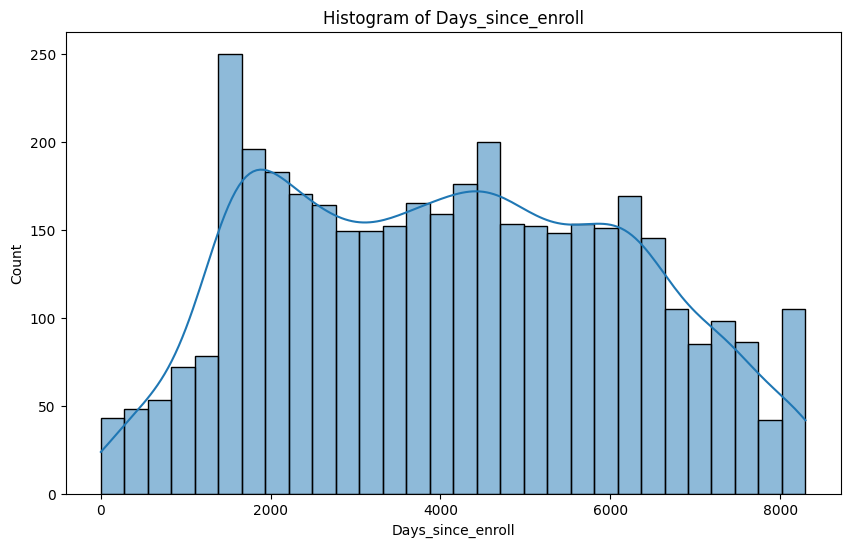

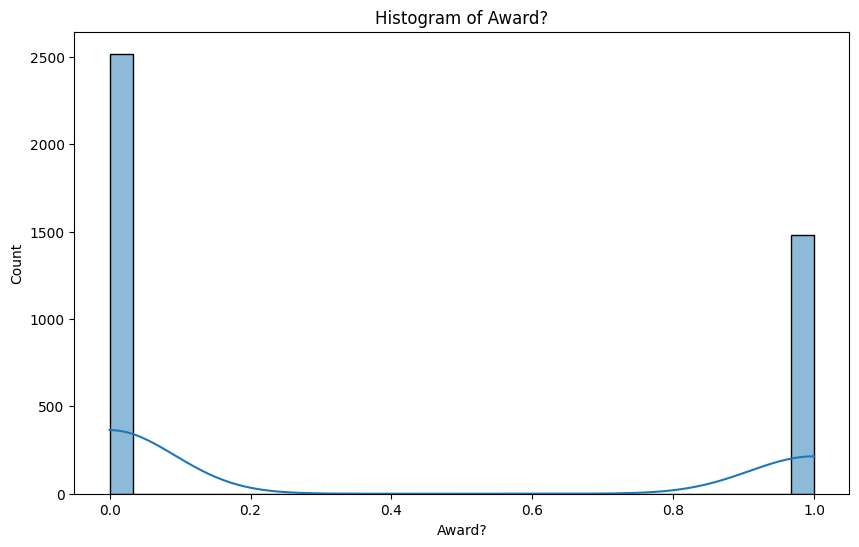

In [14]:
# Histograms for numerical features
for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[column],bins=30,kde=True)
  plt.title(f"Histogram of {column}")
  plt.show()

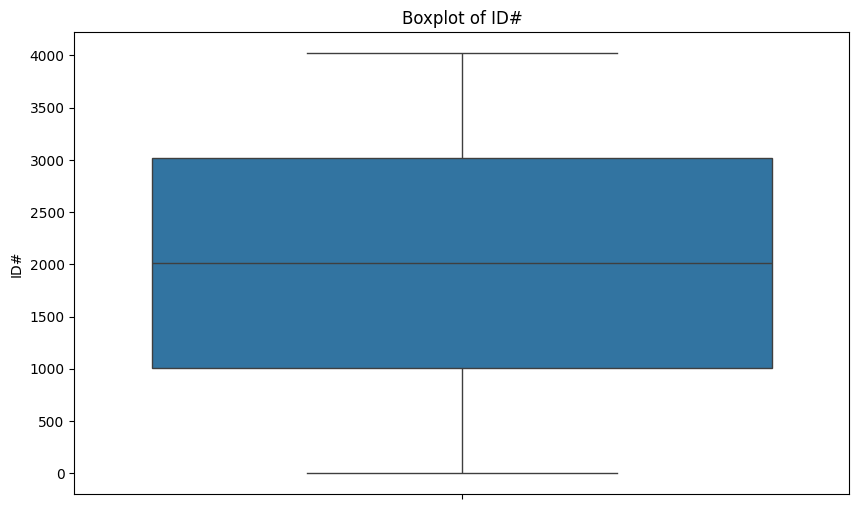

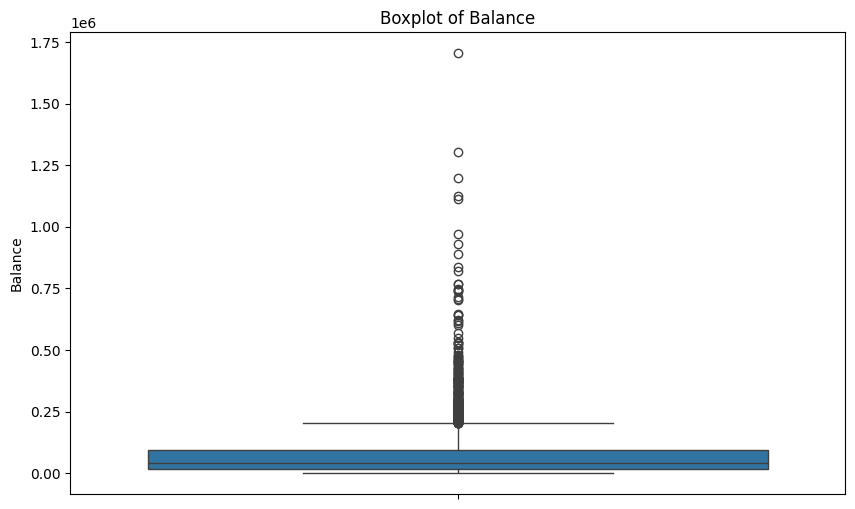

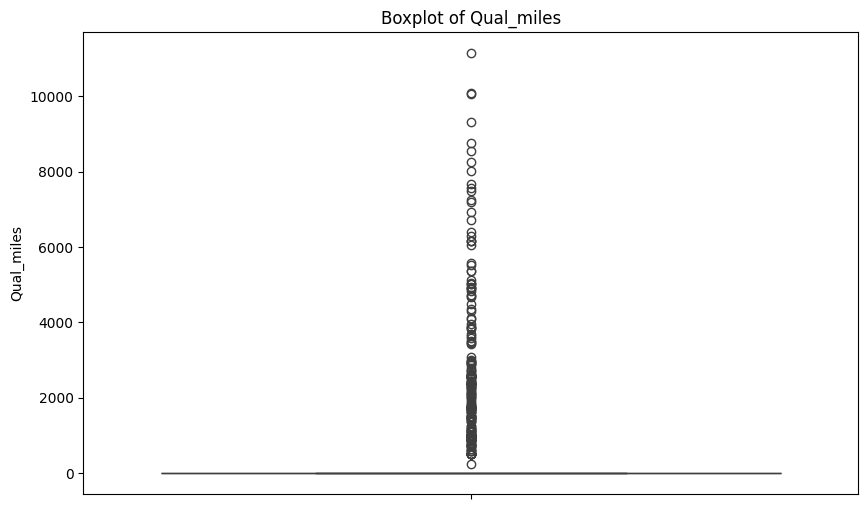

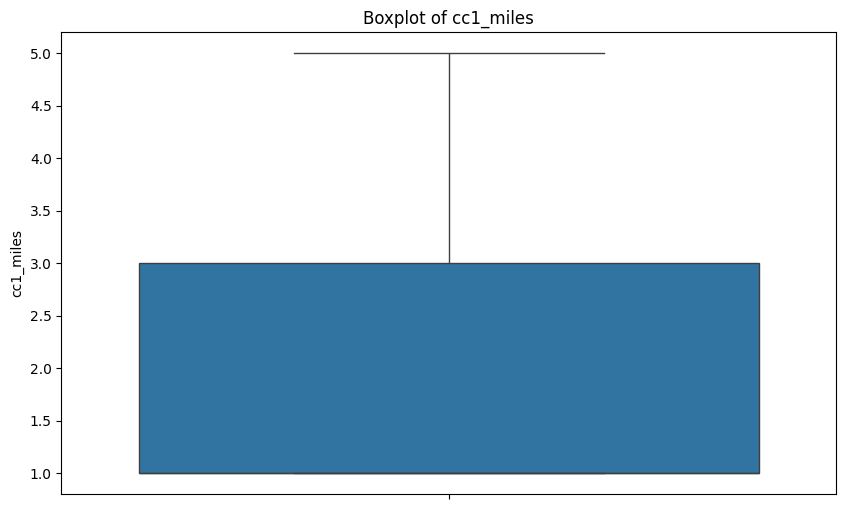

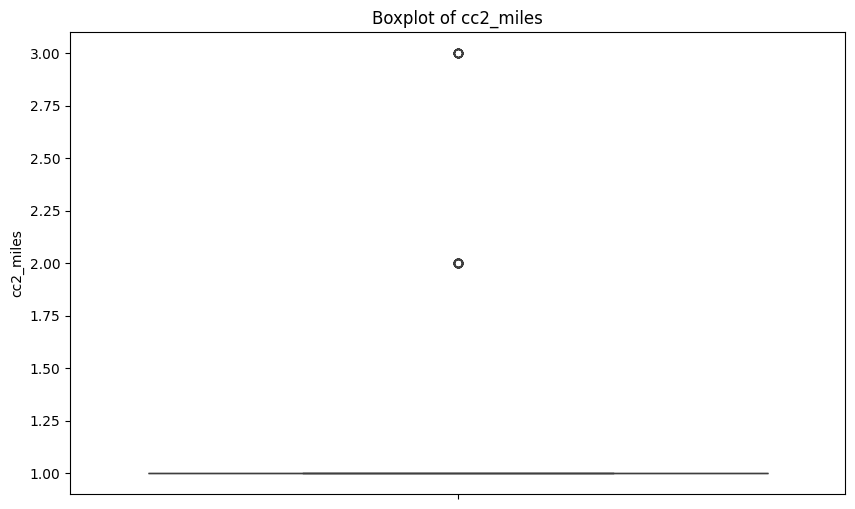

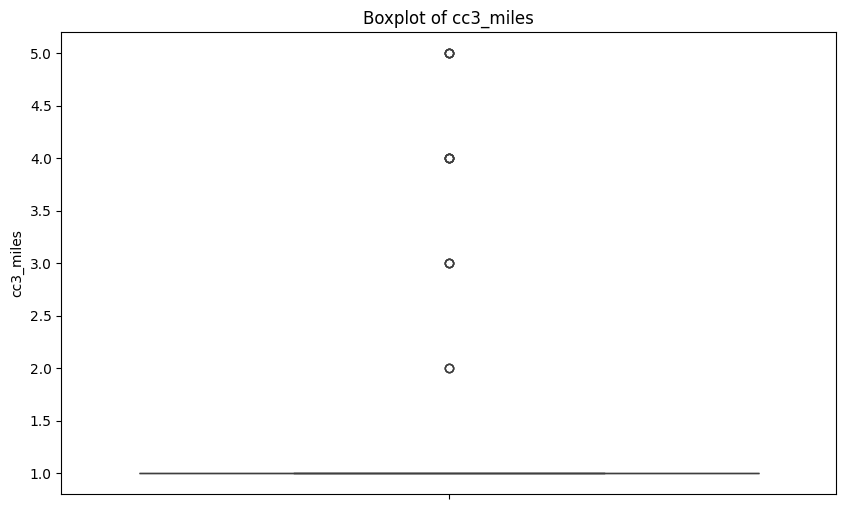

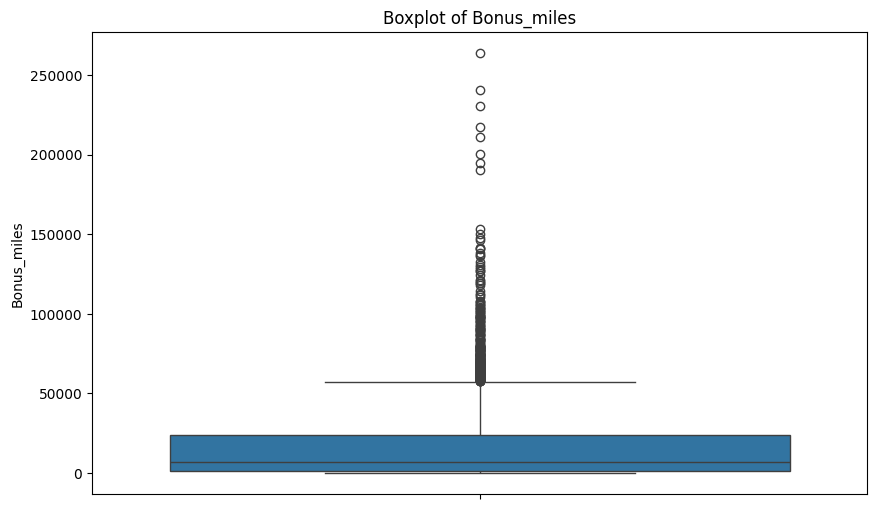

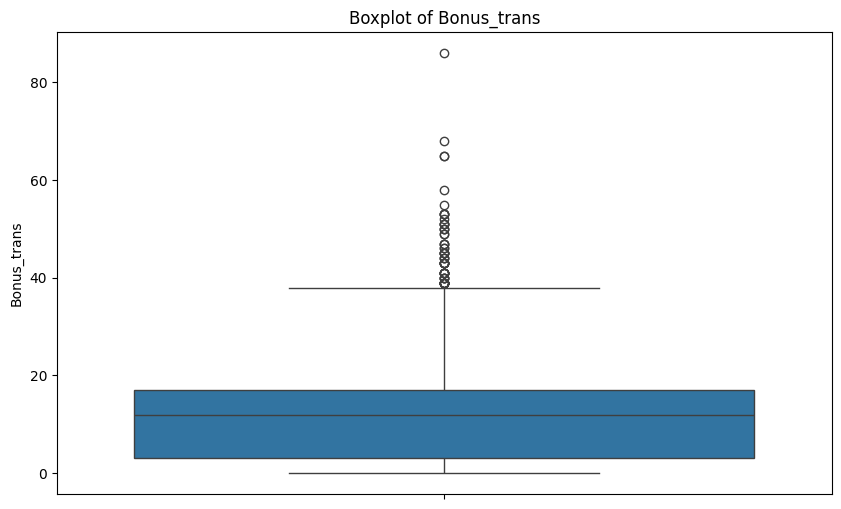

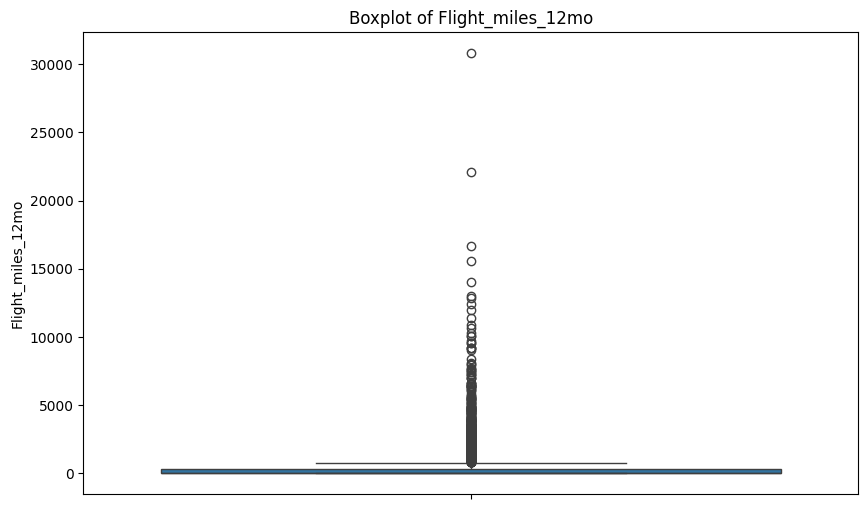

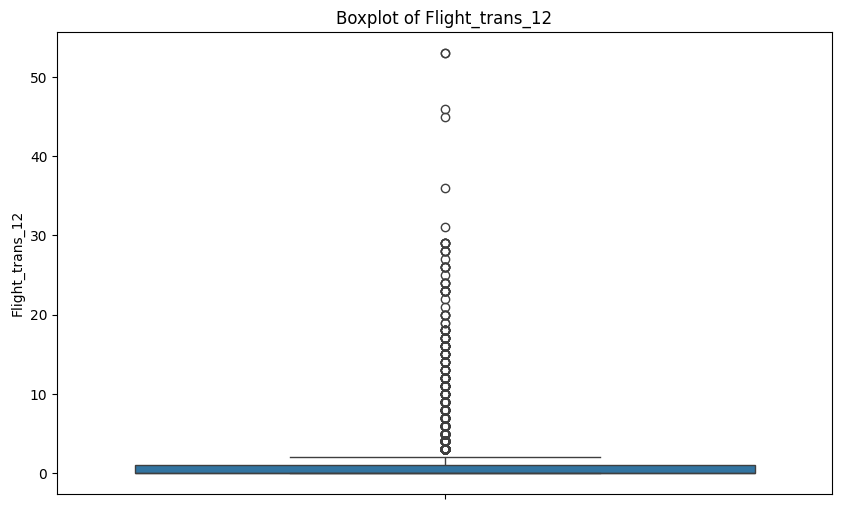

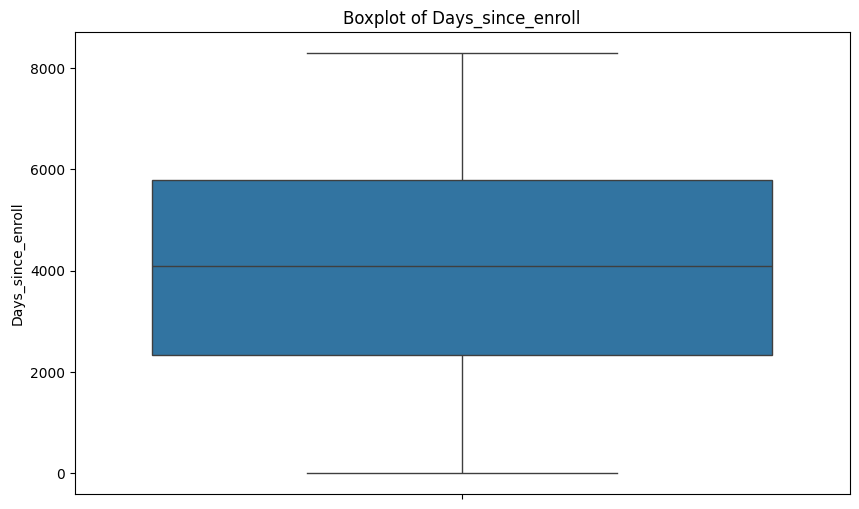

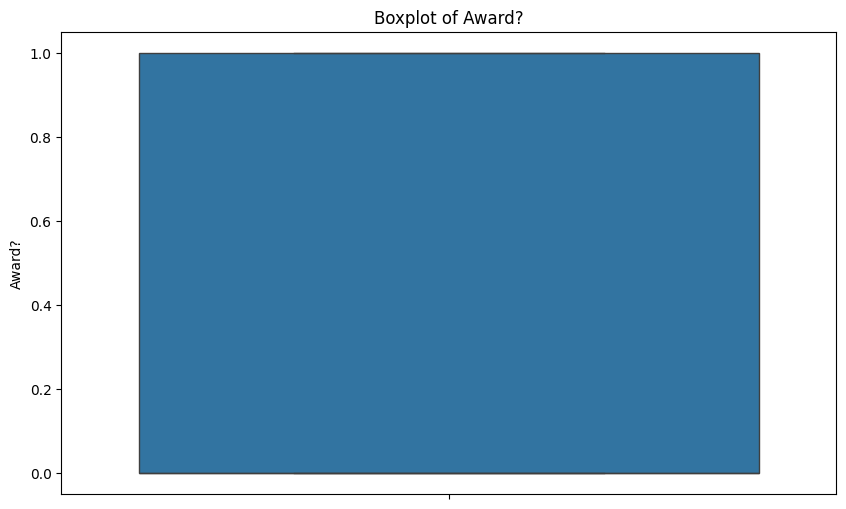

In [15]:
#bBox plots for each numerical features
for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

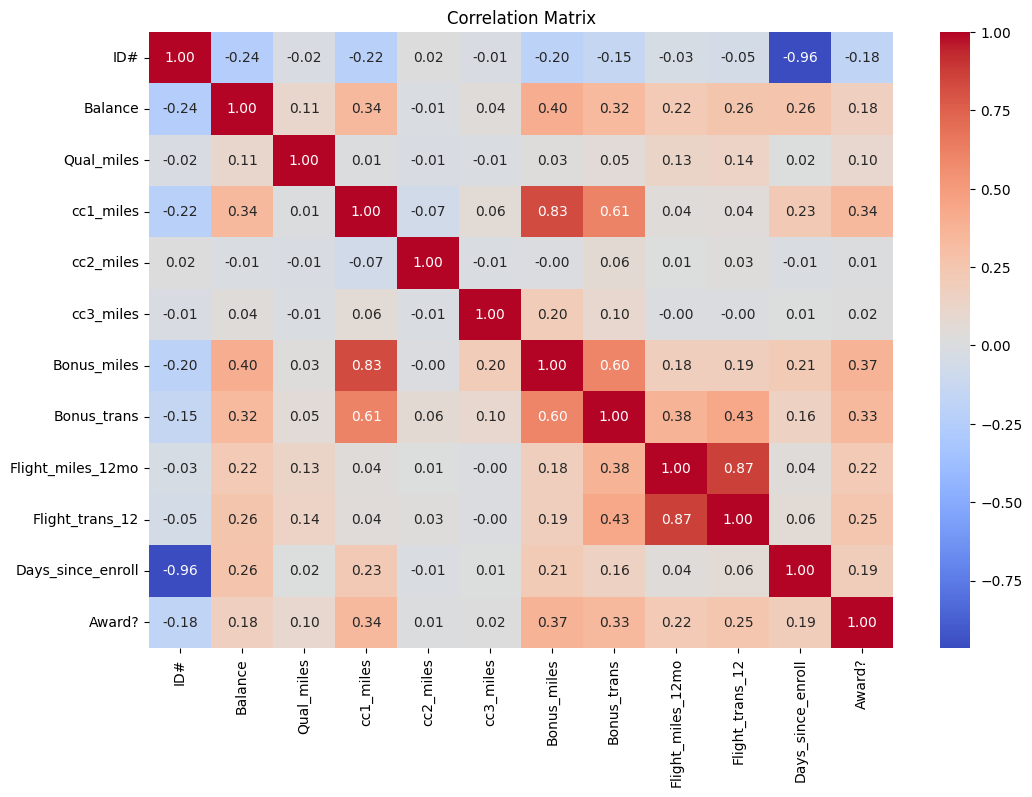

In [16]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##Implementing Clustering Algorithms:

###K-Means Clustering


In [17]:
from sklearn.cluster import KMeans

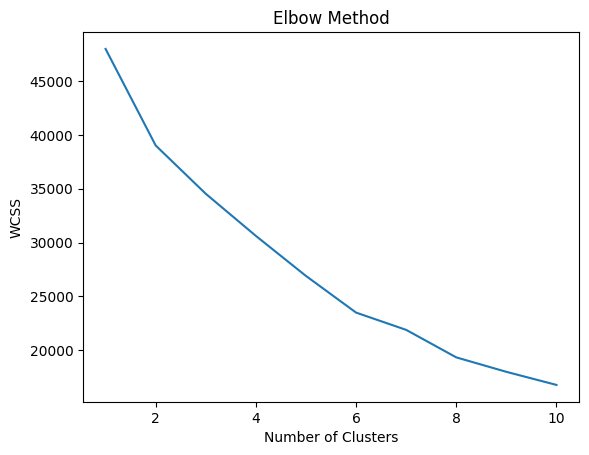

In [18]:
# Elbow Method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(df_standardized)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
n_clusters =2
kmeans = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df_standardized)

df['Cluster']=y_kmeans #Add cluster information to original dataframe

In [21]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


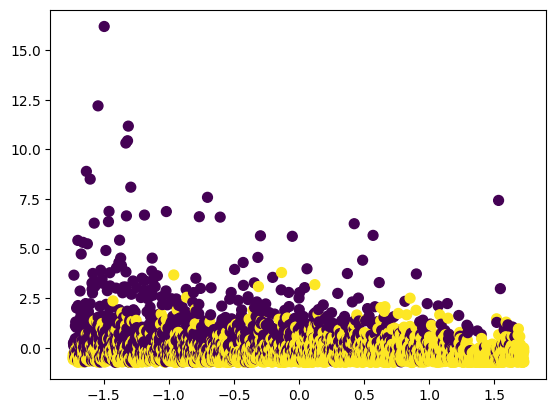

In [44]:
plt.scatter(df_standardized[:,0],df_standardized[:,1],c=y_kmeans,s=50,cmap='viridis')

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
kmeans_score = silhouette_score(df_standardized,kmeans.labels_)
print(f'K-Means Silhouette Score: {kmeans_score}')

K-Means Silhouette Score: 0.29782139660896717


##Hierarchical Clustering

In [47]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [39]:

# Compute the linkage matrix
z =  linkage(df_standardized,method='ward')

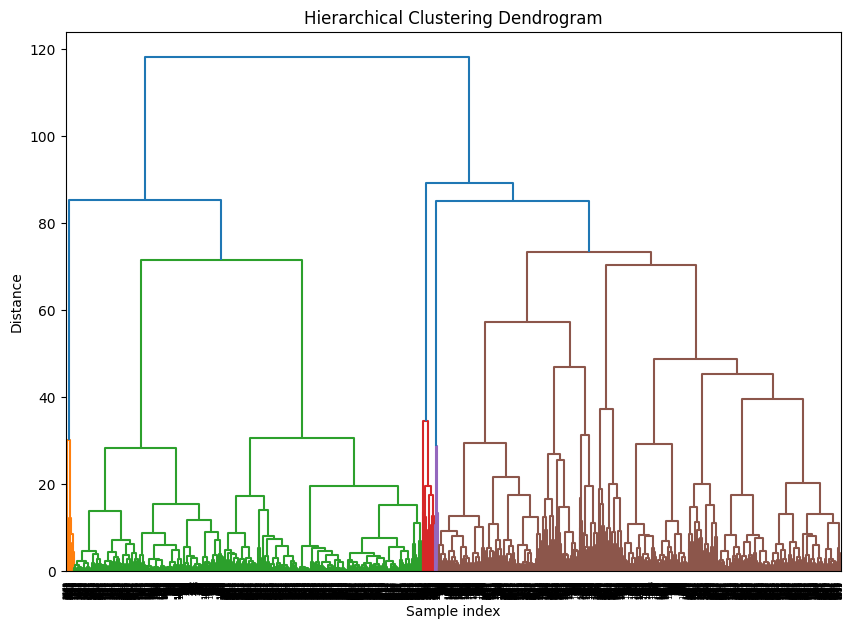

In [48]:
# Plot the dendrogram
plt.figure(figsize=(10,7))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [49]:
n_clusters = 3
clusters = fcluster(z,n_clusters, criterion='maxclust')

In [50]:
# Add cluster information to the dataframe
df['Hierarchical_cluster'] = clusters

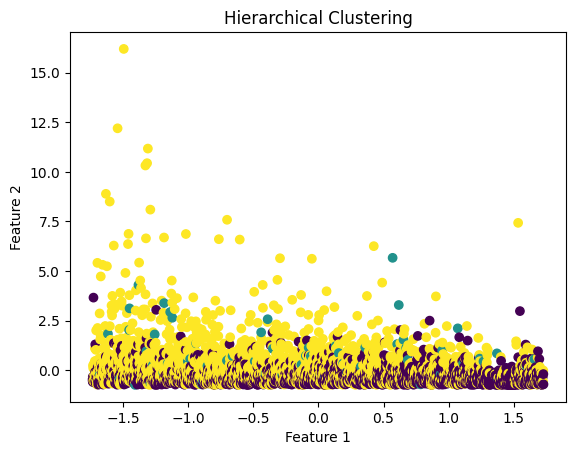

In [51]:
# Visualize the clusters
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()

In [52]:
hierarchical_score = silhouette_score(df_standardized, df['Hierarchical_cluster'])
print(f'Hierarchical Silhouette Score: {hierarchical_score}')

Hierarchical Silhouette Score: 0.20526614352218822


##DBSCAN Clustering

In [55]:
from sklearn.cluster import DBSCAN

In [57]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_clusters  = dbscan.fit_predict(df_standardized)

In [58]:
# Add cluster information to the dataframe
df['DBSCAN_Cluster'] = dbscan_clusters

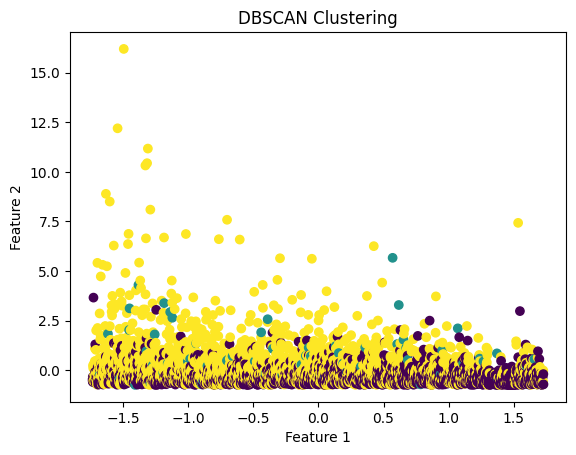

In [59]:
# Visualize the clusters
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [60]:
dbscan_score = silhouette_score(df_standardized,df['DBSCAN_Cluster'])
print(f'DBSCAN Silhouette Score: {dbscan_score}')

DBSCAN Silhouette Score: -0.2823258834687895
